# PA 2: Classification - Nearest Neighbors

## Student Details (1 Point)

First Student Name and ID: ABC 1001XXXXXX

Second Student Name and ID: XYZ 1001XXXXXX



Notes: When submitting, fill your name and ID in this cell.  [1 point]


Do not to forget to cite any external sources used by you.

## Programming Assignment Submission Instructions (2 Points)

Step 1: Rename this submission file as 'yourLastName_Last4digitsofyourID_DT.ipynb' [1 point]

Step 2: Place this file inside the folder 'PA#2_Classification_yourLastName'  [1 point]

Do not upload the database file [-20 points]


## Programming Assignment Details (25 Points)

For this assignment use Jupyter notebook, Panda, and scikit.
* Load wine dataset from sklearn datasets. [1 points]
* while selecting best 3 attributes for training and testing your model. [2 points]
* Find the best K. [3 points]
* Split your dataset 70% for training, and 30% for testing the classifier. [2 points]
* Use Euclidean distance.[3 points]
* Test the classifier with three diferent numbers for neighbors and record the results.[3 points]
* Use comments to explain your code and variable names.[2 points]
* Calculate and print the confusion matrix, and the classification Report (includes:precision, recall, f1-score, andsupport) for all three different numbers.[6 points]
* Plot the classifier in a 2D projection.[3 points]

# Report (22 Points)

For each classification task you need to submit a report (Microsoft Word, or PDF) that you have to:
* Describe the Nearest Neighbors method. [5 points]
* Explain what was your criteria for selecting the three attributes. [7 points]
* Visualizations of the classifier in a 2D projection, and write your observations. [5 points]
* Interprete and compare the results.[5 points]

Do not to forget to cite your sources!

## <b>Please consult the TA before using any other packages apart from sklearn,numpy,pandas, matplotlib and seaborn<b>

Rishitha Patel:1001863136 
Karthik Natarajan:1001872904
Angad Tarikere Manjunatha:1001718335

In [ ]:
%matplotlib notebook
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from pandas import Series, DataFrame

#For visualization. Matplotlib for basic viz and seaborn for more stylish figures
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn import neighbors

In [ ]:
titanic = pd.read_csv('titanic.csv')
titanic.head()
      #titaninc.head() gives the first five rows of the dataset.  
      #we will print first five rows only to examine the dataset.

Survived  Pclass                                               Name  \
0         0       3                            Braund, Mr. Owen Harris   
1         1       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2         1       3                             Heikkinen, Miss. Laina   
3         1       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4         0       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S  
1  female  38.0      1      0          PC 17599  71.2833   C85        C  
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S  
3  female  35.0      1      0            113803  53.1000  C123        S  
4    male  35.0      0      0            373450   8.0500   NaN        S

In [ ]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [ ]:
titanic['Title'] = titanic['Name'].str.extract('([A-Za-z]+)\.', expand=True)
titanic['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [ ]:
title_reduction = {'Mr': 'Mr', 'Mrs': 'Mrs', 'Miss': 'Miss', 
                   'Master': 'Master', 'Don': 'Mr', 'Rev': 'Rev',
                   'Dr': 'Dr', 'Mme': 'Miss', 'Ms': 'Miss',
                   'Major': 'Mr', 'Lady': 'Mrs', 'Sir': 'Mr',
                   'Mlle': 'Miss', 'Col': 'Mr', 'Capt': 'Mr',
                   'Countess': 'Mrs','Jonkheer': 'Mr'}
titanic['Title'] = titanic['Title'].map(title_reduction)
titanic['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rev', 'Dr'], dtype=object)

In [ ]:
#fiiting empty values in data with median of age compared against age group of title from name
for title, age in titanic.groupby('Title')['Age'].median().iteritems():
    print(title, age)
    titanic.loc[(titanic['Title']==title) & (titanic['Age'].isnull()), 'Age'] = age

Dr 46.5
Master 3.5
Miss 21.5
Mr 30.0
Mrs 35.0
Rev 46.5


In [ ]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
Title         0
dtype: int64

In [ ]:
#‘Sex’ column has the string value and that needs to be changed.
#I will change the ‘male’ for 0 and ‘female’ for 1
titanic['Sex'] = titanic.Sex.replace({'male':0, 
         'female':1})

In [ ]:
titanic['Sex']

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex, Length: 891, dtype: int64

In [ ]:
titanic1 = titanic[['Pclass','Sex','Fare','Survived']]
X = titanic1[['Pclass', 'Sex', 'Fare']]
y = titanic1['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=1)
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
knn.score(X_train, y_train)


#X=X.to_numpy()
#y=y.to_numpy()
#print(X)
#print(type(X))
#print(y)
#print(type(y))

0.8314606741573034

In [ ]:
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1], dtype=int64)

In [ ]:
knn.predict([[3, 1, 25]])

array([0], dtype=int64)

In [ ]:
training_accuracy  = []  
test_accuracy = []
for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = i,metric='euclidean')
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    test_accuracy.append(knn.score(X_test, y_test))

<IPython.core.display.Javascript object>


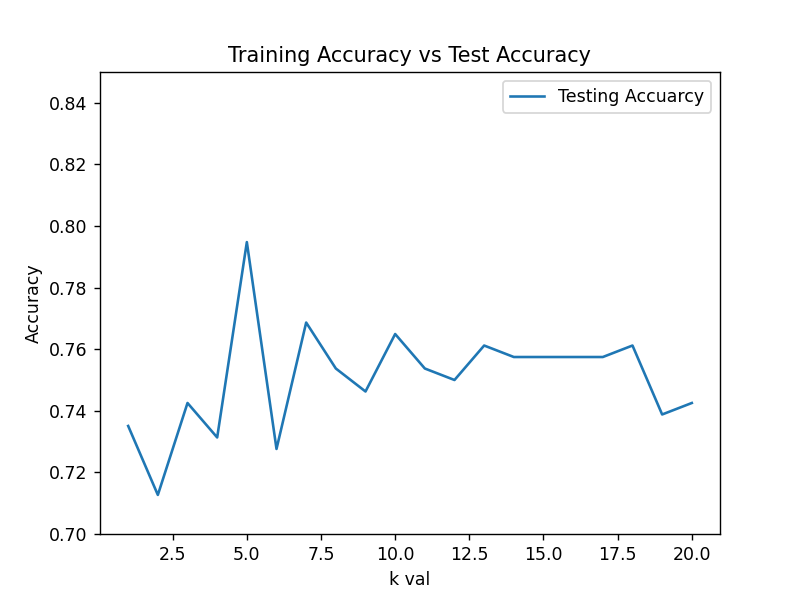

best values for k  are
1 5 13


In [ ]:
plt.figure()
plt.plot(range(1, 21), test_accuracy, label='Testing Accuarcy')
plt.title('Training Accuracy vs Test Accuracy')
plt.xlabel('k val')
plt.ylabel('Accuracy')
plt.ylim([0.7, 0.85])
plt.legend(loc='best')
plt.show()

print("best values for k  are"+"\n"+"1 "+"5 "+"13")

In [ ]:
X = titanic1[['Pclass','Fare']]
y = titanic1['Survived']

In [ ]:
X=X.to_numpy()
y=y.to_numpy()

<IPython.core.display.Javascript object>


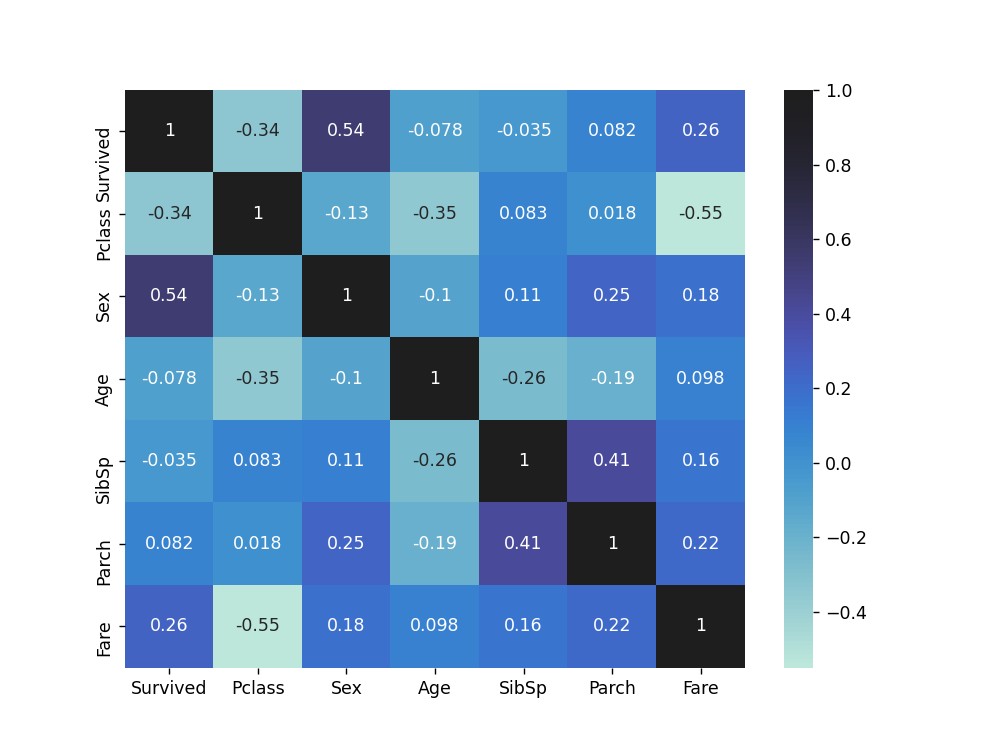

<AxesSubplot:>

In [ ]:
titanic.corr()
plt.subplots(figsize=(8,6))
sns.heatmap(titanic.corr(),center=1,annot=True)

In [ ]:
def knn(n_neighbors):     
    from sklearn import metrics 
    X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3,random_state=1)
    neigh = KNeighborsClassifier(n_neighbors=n_neighbors, metric='euclidean') # using euclidean distance
    neigh.fit(X, y) # fitting the model
    y_predict = neigh.predict(X_test) # predicting the test dataset
    
    from sklearn.metrics import accuracy_score
    
    print("The Accuracy is:", accuracy_score(y_test,y_predict)*100,"\n")
    print("Confusion Matrix is: \n",'\n')
    metrics.plot_confusion_matrix(neigh, X_test, y_test,cmap=plt.cm.Reds,display_labels=["Survive","Not Survived"])
    plt.show()
    print("Classification Report: \n",classification_report(y_test,y_predict))
    
 
    

The Accuracy is: 75.3731343283582 

Confusion Matrix is: 
 



<IPython.core.display.Javascript object>


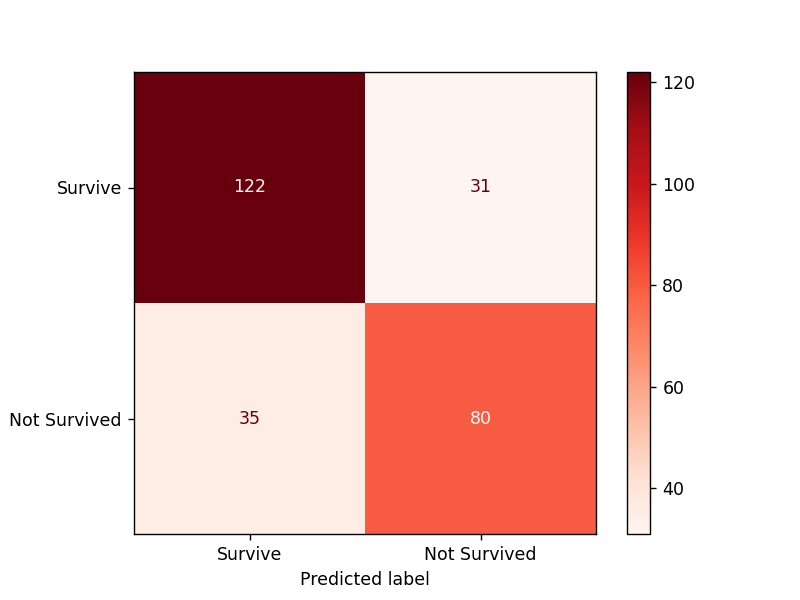

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.80      0.79       153
           1       0.72      0.70      0.71       115

    accuracy                           0.75       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.75      0.75      0.75       268



In [ ]:
knn(n_neighbors=3)

The Accuracy is: 72.76119402985076 

Confusion Matrix is: 
 



<IPython.core.display.Javascript object>


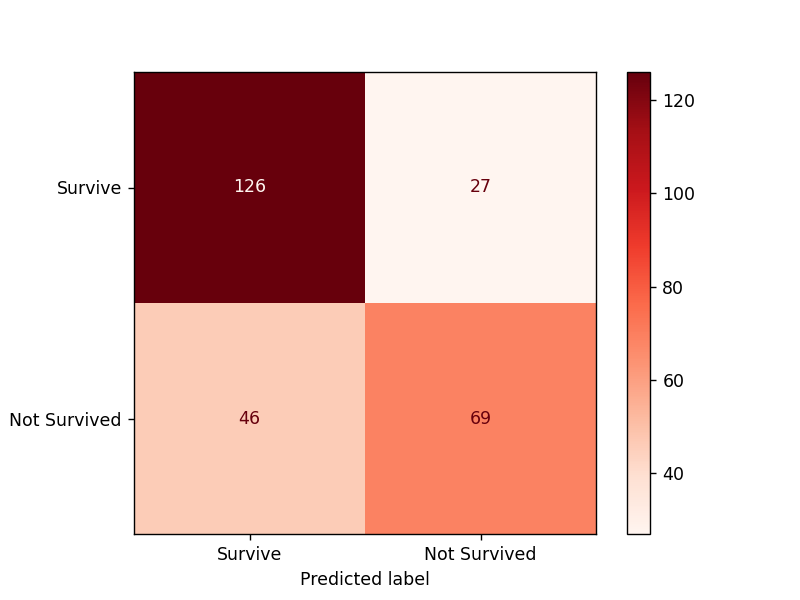

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.82      0.78       153
           1       0.72      0.60      0.65       115

    accuracy                           0.73       268
   macro avg       0.73      0.71      0.71       268
weighted avg       0.73      0.73      0.72       268



In [ ]:
knn(n_neighbors=4)

The Accuracy is: 74.6268656716418 

Confusion Matrix is: 
 



<IPython.core.display.Javascript object>


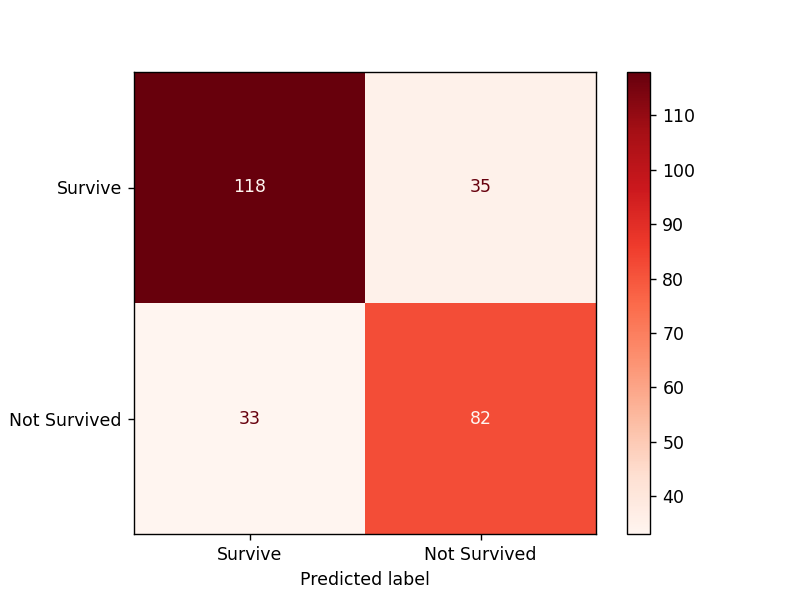

Classification Report: 
               precision    recall  f1-score   support

           0       0.78      0.77      0.78       153
           1       0.70      0.71      0.71       115

    accuracy                           0.75       268
   macro avg       0.74      0.74      0.74       268
weighted avg       0.75      0.75      0.75       268



In [ ]:
knn(n_neighbors=5)

The Accuracy is: 75.3731343283582 

Confusion Matrix is: 
 



<IPython.core.display.Javascript object>


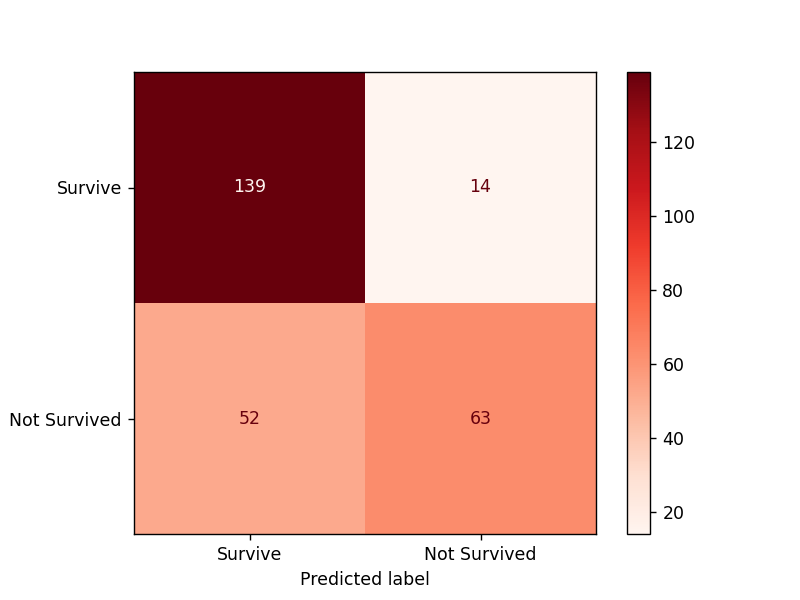

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.91      0.81       153
           1       0.82      0.55      0.66       115

    accuracy                           0.75       268
   macro avg       0.77      0.73      0.73       268
weighted avg       0.77      0.75      0.74       268



In [ ]:
knn(n_neighbors=6)

The Accuracy is: 73.13432835820896 

Confusion Matrix is: 
 



<IPython.core.display.Javascript object>


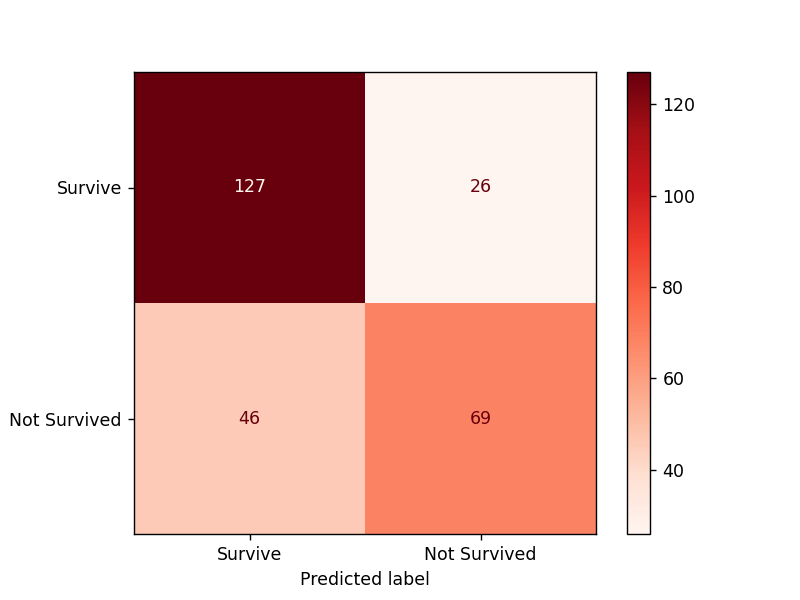

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.83      0.78       153
           1       0.73      0.60      0.66       115

    accuracy                           0.73       268
   macro avg       0.73      0.72      0.72       268
weighted avg       0.73      0.73      0.73       268



In [ ]:
knn(n_neighbors=7)

The Accuracy is: 74.25373134328358 

Confusion Matrix is: 
 



<IPython.core.display.Javascript object>


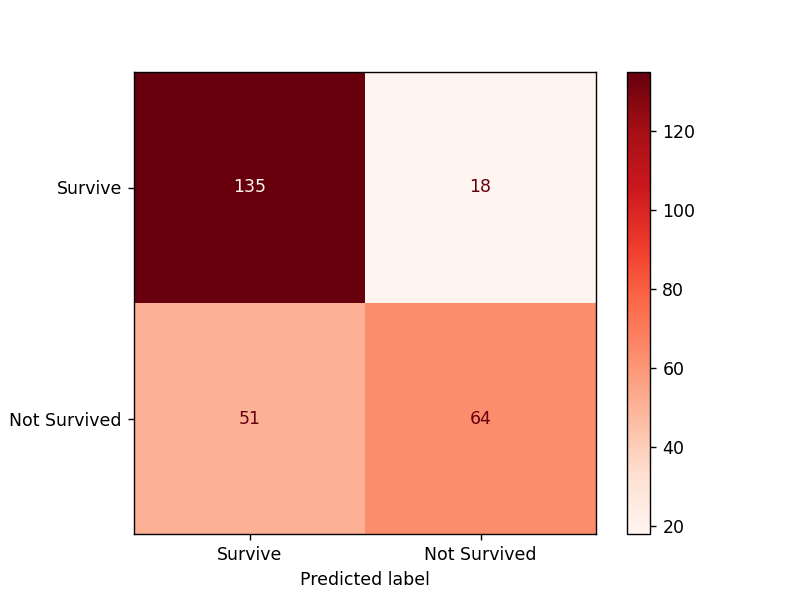

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.88      0.80       153
           1       0.78      0.56      0.65       115

    accuracy                           0.74       268
   macro avg       0.75      0.72      0.72       268
weighted avg       0.75      0.74      0.73       268



In [ ]:
knn(n_neighbors=8)

The Accuracy is: 74.6268656716418 

Confusion Matrix is: 
 



<IPython.core.display.Javascript object>


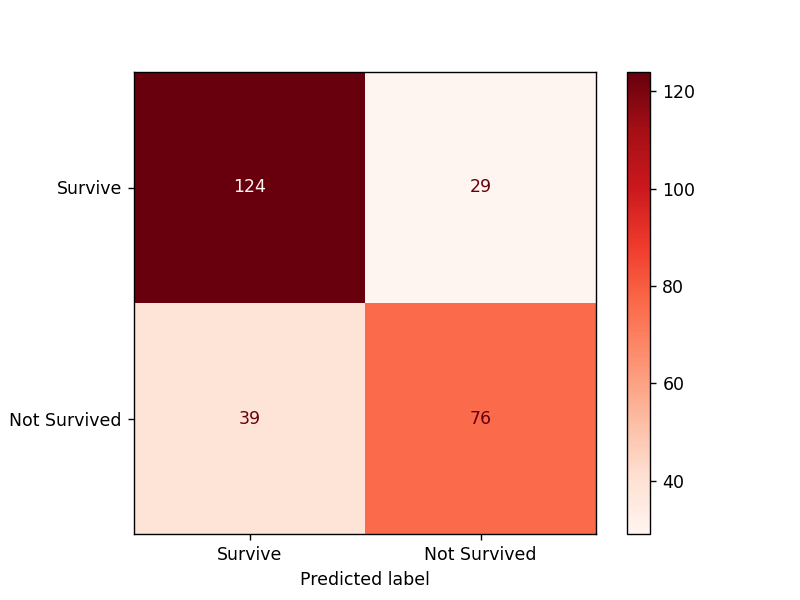

Classification Report: 
               precision    recall  f1-score   support

           0       0.76      0.81      0.78       153
           1       0.72      0.66      0.69       115

    accuracy                           0.75       268
   macro avg       0.74      0.74      0.74       268
weighted avg       0.74      0.75      0.74       268



In [ ]:
knn(n_neighbors=9)

The Accuracy is: 73.50746268656717 

Confusion Matrix is: 
 



<IPython.core.display.Javascript object>


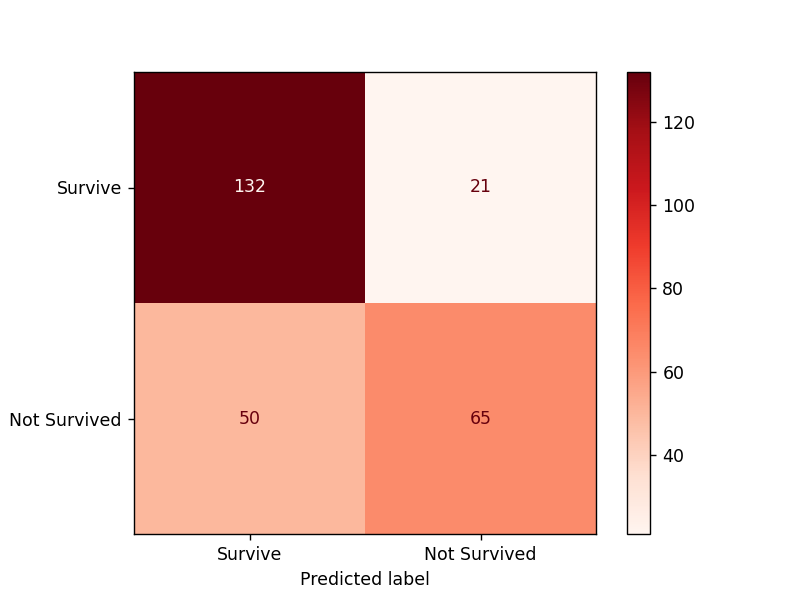

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.86      0.79       153
           1       0.76      0.57      0.65       115

    accuracy                           0.74       268
   macro avg       0.74      0.71      0.72       268
weighted avg       0.74      0.74      0.73       268



In [ ]:
knn(n_neighbors=10)

The Accuracy is: 72.76119402985076 

Confusion Matrix is: 
 



<IPython.core.display.Javascript object>


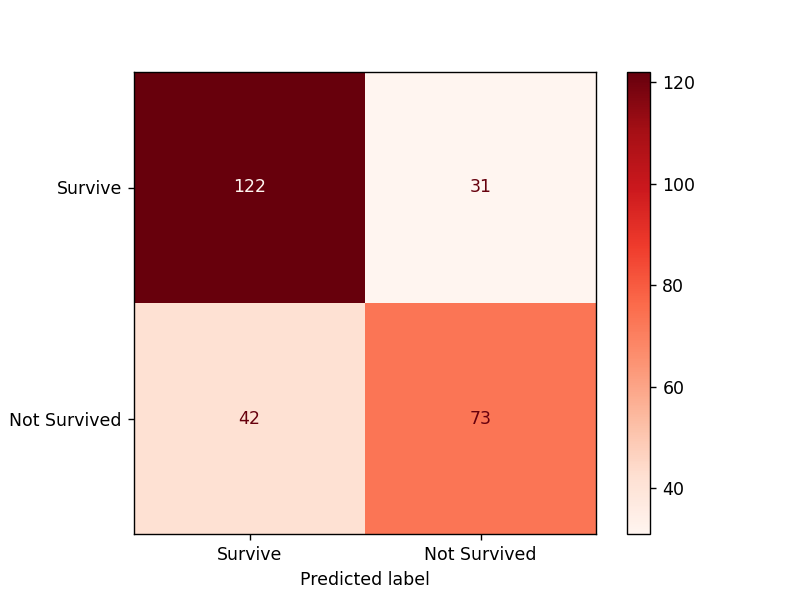

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.80      0.77       153
           1       0.70      0.63      0.67       115

    accuracy                           0.73       268
   macro avg       0.72      0.72      0.72       268
weighted avg       0.73      0.73      0.73       268



In [ ]:
knn(n_neighbors=11)

The Accuracy is: 72.38805970149254 

Confusion Matrix is: 
 



<IPython.core.display.Javascript object>


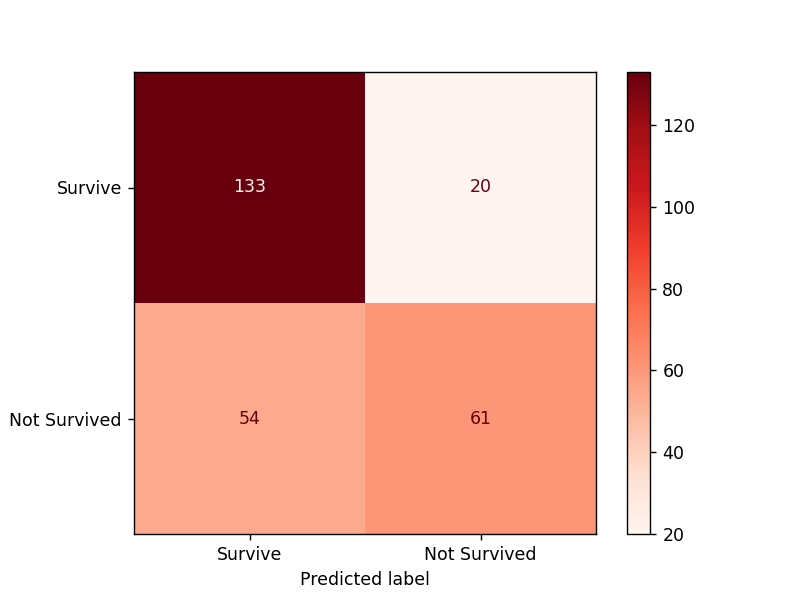

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.87      0.78       153
           1       0.75      0.53      0.62       115

    accuracy                           0.72       268
   macro avg       0.73      0.70      0.70       268
weighted avg       0.73      0.72      0.71       268



In [ ]:
knn(n_neighbors=12)

The Accuracy is: 72.38805970149254 

Confusion Matrix is: 
 



<IPython.core.display.Javascript object>


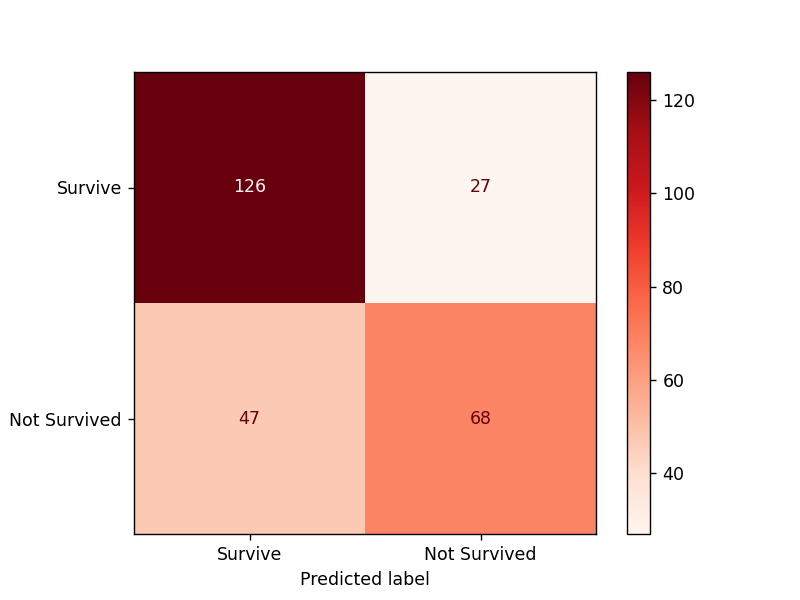

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.82      0.77       153
           1       0.72      0.59      0.65       115

    accuracy                           0.72       268
   macro avg       0.72      0.71      0.71       268
weighted avg       0.72      0.72      0.72       268



In [ ]:
knn(n_neighbors=13)

The Accuracy is: 73.50746268656717 

Confusion Matrix is: 
 



<IPython.core.display.Javascript object>


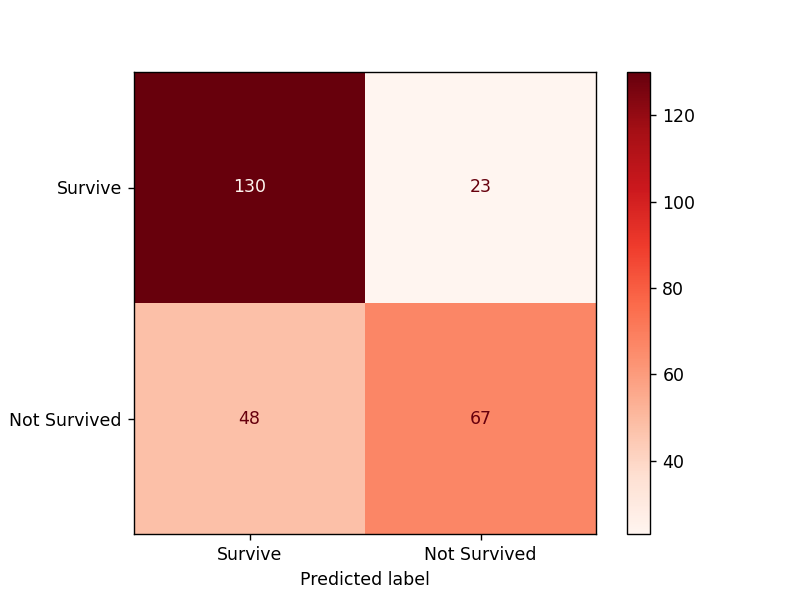

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.85      0.79       153
           1       0.74      0.58      0.65       115

    accuracy                           0.74       268
   macro avg       0.74      0.72      0.72       268
weighted avg       0.74      0.74      0.73       268



In [ ]:
knn(n_neighbors=14)

The Accuracy is: 72.01492537313433 

Confusion Matrix is: 
 



<IPython.core.display.Javascript object>


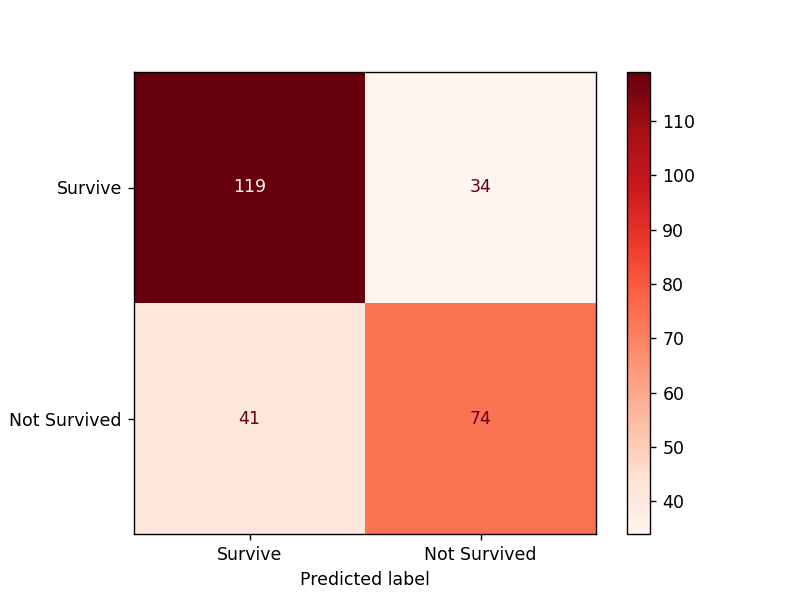

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.78      0.76       153
           1       0.69      0.64      0.66       115

    accuracy                           0.72       268
   macro avg       0.71      0.71      0.71       268
weighted avg       0.72      0.72      0.72       268



In [ ]:
knn(n_neighbors=15)

The Accuracy is: 72.38805970149254 

Confusion Matrix is: 
 



<IPython.core.display.Javascript object>


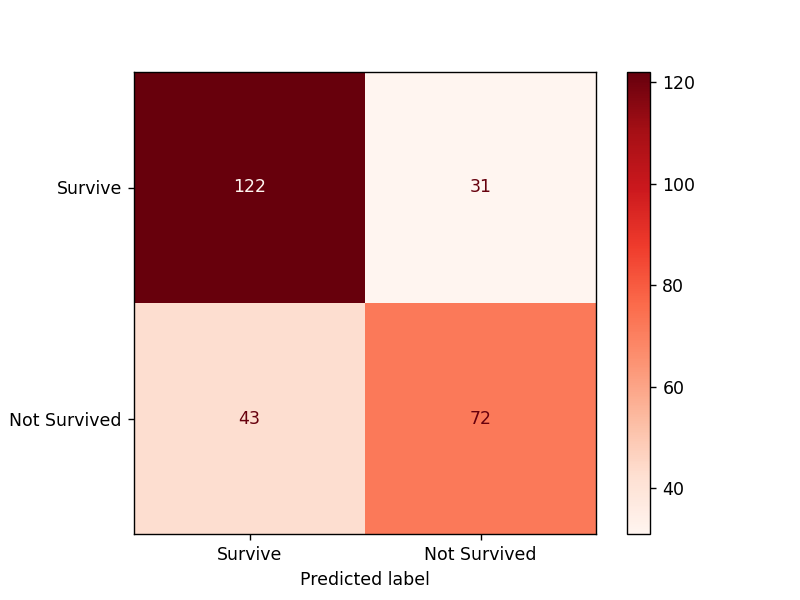

Classification Report: 
               precision    recall  f1-score   support

           0       0.74      0.80      0.77       153
           1       0.70      0.63      0.66       115

    accuracy                           0.72       268
   macro avg       0.72      0.71      0.71       268
weighted avg       0.72      0.72      0.72       268



In [ ]:
knn(n_neighbors=16)

The Accuracy is: 71.64179104477611 

Confusion Matrix is: 
 



<IPython.core.display.Javascript object>


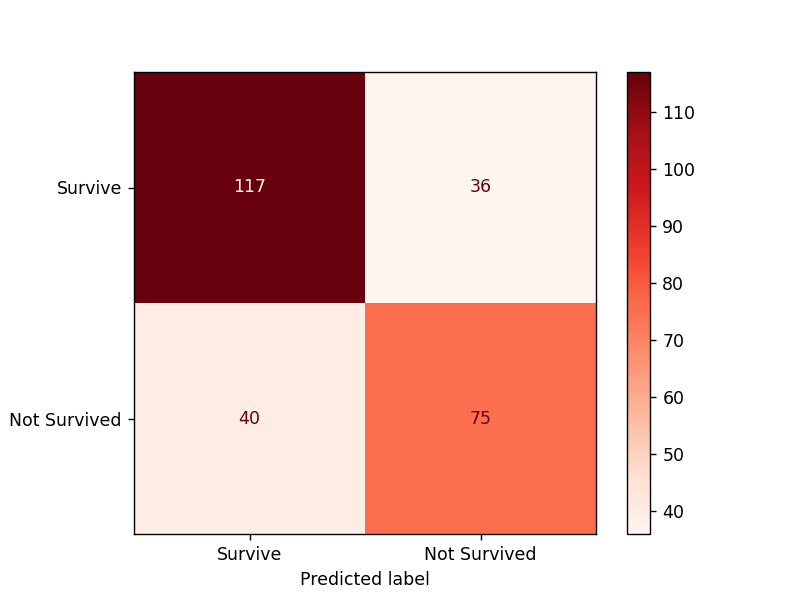

Classification Report: 
               precision    recall  f1-score   support

           0       0.75      0.76      0.75       153
           1       0.68      0.65      0.66       115

    accuracy                           0.72       268
   macro avg       0.71      0.71      0.71       268
weighted avg       0.72      0.72      0.72       268



In [ ]:
knn(n_neighbors=17)

The Accuracy is: 72.01492537313433 

Confusion Matrix is: 
 



<IPython.core.display.Javascript object>


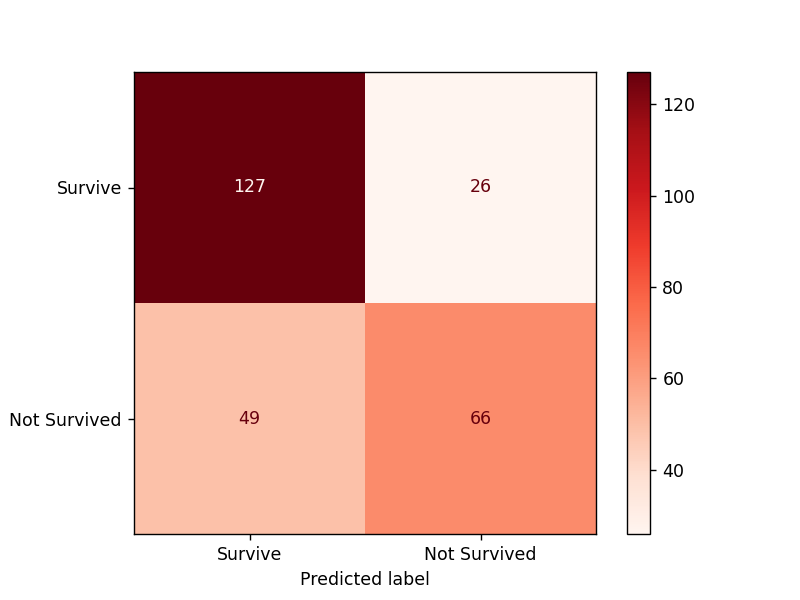

Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.83      0.77       153
           1       0.72      0.57      0.64       115

    accuracy                           0.72       268
   macro avg       0.72      0.70      0.70       268
weighted avg       0.72      0.72      0.71       268



In [ ]:
knn(n_neighbors=18)

The Accuracy is: 72.01492537313433 

Confusion Matrix is: 
 



<IPython.core.display.Javascript object>


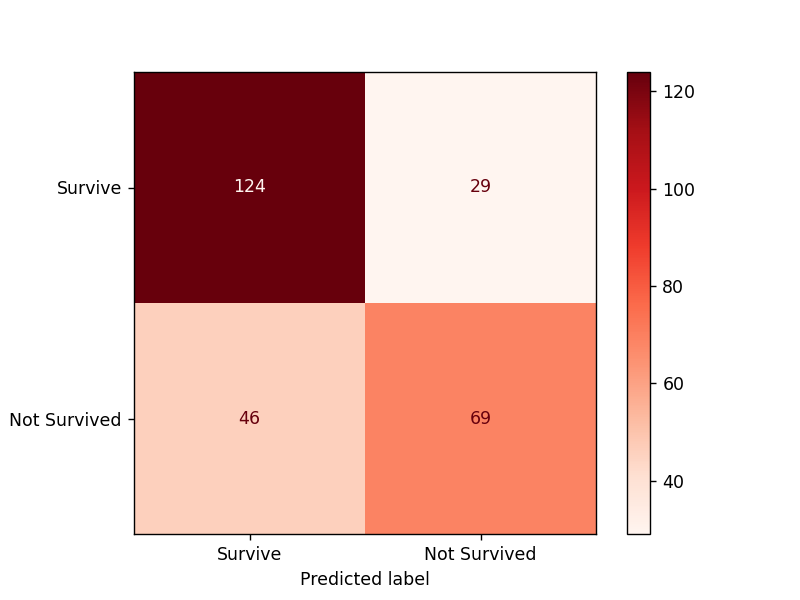

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.81      0.77       153
           1       0.70      0.60      0.65       115

    accuracy                           0.72       268
   macro avg       0.72      0.71      0.71       268
weighted avg       0.72      0.72      0.72       268



In [ ]:
knn(n_neighbors=19)

The Accuracy is: 72.76119402985076 

Confusion Matrix is: 
 



C:\Users\Rishitha eddy\anaconda3\lib\site-packages\sklearn\metrics\_plot\confusion_matrix.py:111: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


<IPython.core.display.Javascript object>


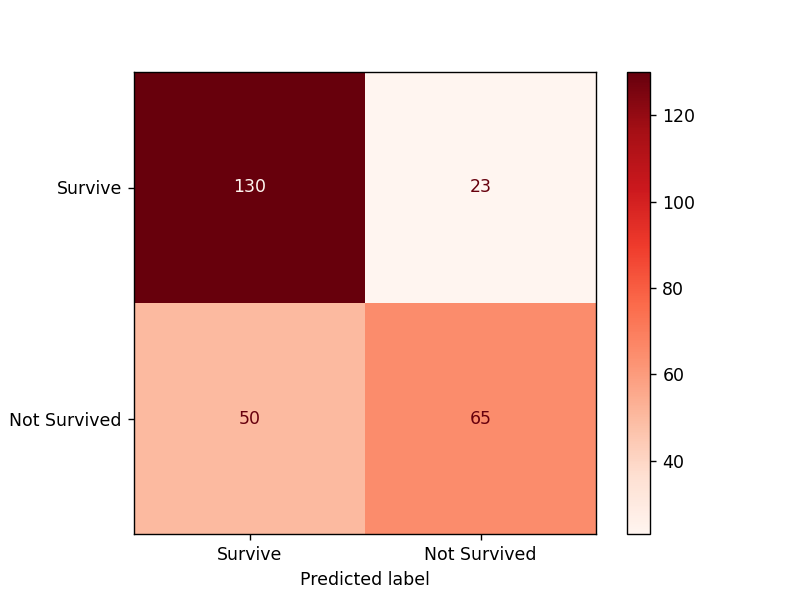

Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.85      0.78       153
           1       0.74      0.57      0.64       115

    accuracy                           0.73       268
   macro avg       0.73      0.71      0.71       268
weighted avg       0.73      0.73      0.72       268



In [ ]:
knn(n_neighbors=20)